# Assignment 2: Neural Networks

## DTSC-680: Applied Machine Learning

## Name:

### Overview

In this assignment, you will create a neural network to perform a binary classification on a coronavirus dataset.

### Install Tensorflow 2.9.2

In [1]:
# common imports
import numpy as np
import pandas as pd

### Data Prep

The coronavirus dataset is included in the `corona.csv` file. Read the data into a pandas DataFrame called `covid`.

In [2]:
covid = pd.read_csv("corona.csv", encoding='utf-8', low_memory=False)
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


Before we can pass the data through a neural network, the data needs to be cleaned. Perform the following data cleaning and preprocessing tasks:
- Take a look at the dataset's metadata. Do any rows contain NULL values? If so, drop those rows.
- Change the datatypes of each column. They should each be binary, float64 columns. You may find the [`replace` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) useful for this.
- Drop all of the rows where the value in the `Corona` column is `other`.
- Split the dataframe into 2: `symptoms`, which contains the features of the dataset, and `diagnosis`, which contains onlny the target column, `Corona`.
- Use scikit-learn's `train_test_split` on the data to generate the `x_train`, `x_test`, `y_train`, and `y_test`. Reserve 20% of the data for testing and set the `stratify` parameter to `diagnosis`.

In [3]:
covid = covid.drop(columns=['Ind_ID', 'Test_date', 'Age_60_above', 'Sex'], errors='ignore')

In [4]:
covid = covid.dropna()

In [5]:
covid = covid.replace({
    'positive': 1, 'negative': 0,
    'Contact with confirmed': 1, 'Abroad': 0,
    True: 1, False: 0
})


In [6]:
covid = covid[covid['Corona'] != 'other']


In [7]:
covid = covid.drop(columns=['Ind_ID', 'Test_date'], errors='ignore')

covid = covid.replace({
    'negative': 0,
    'positive': 1,
    'True': 1,
    'False': 0,
    True: 1,
    False: 0,
    'male': 1,
    'female': 0,
    'unknown': np.nan,
    'Other': np.nan,
    'Contact with confirmed': 1,
    'Abroad': 0
})

covid = covid.dropna()

covid = covid.astype('float64')

In [8]:
diagnosis = covid['Corona']
symptoms = covid.drop(columns=['Corona'])

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(
    symptoms, diagnosis,
    test_size=0.2,
    stratify=diagnosis,
    random_state=0
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (28428, 6)
x_test shape: (7107, 6)
y_train shape: (28428,)
y_test shape: (7107,)


### Training a Binary Classifier

Create a neural network for binary classification with the covid data. This network should include one input layer and one output layer .

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#binary classifier model
model = keras.Sequential([
    layers.Input(shape=(6,)),       
    layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Use the proper training and testing data to train the model for 10 epochs with 100 samples in each epoch. Then, run the following cells to plot the validation and training accuracy and the confusion matrix.

In [11]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=100
)

Epoch 1/10
285/285 [==============================] - 1s 3ms/step - loss: 0.5655 - accuracy: 0.8004 - val_loss: 0.5243 - val_accuracy: 0.8030
Epoch 2/10
285/285 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.8149 - val_loss: 0.4687 - val_accuracy: 0.8313
Epoch 3/10
285/285 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8373 - val_loss: 0.4313 - val_accuracy: 0.8361
Epoch 4/10
285/285 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8444 - val_loss: 0.4051 - val_accuracy: 0.8461
Epoch 5/10
285/285 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8488 - val_loss: 0.3862 - val_accuracy: 0.8478
Epoch 6/10
285/285 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8513 - val_loss: 0.3723 - val_accuracy: 0.8511
Epoch 7/10
285/285 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8558 - val_loss: 0.3619 - val_accuracy: 0.8556
Epoch 

[]

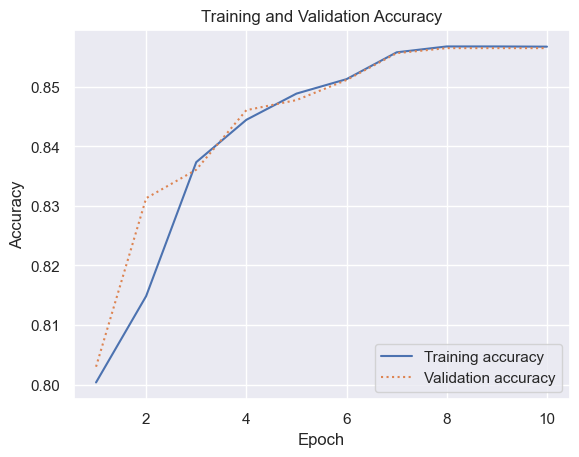

In [12]:
# CODE PROVIDED
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

223/223 [==============================] - 1s 1ms/step
Accuracy: 0.8565
Recall: 0.5907
F1 Score: 0.6801
Precision: 0.8012


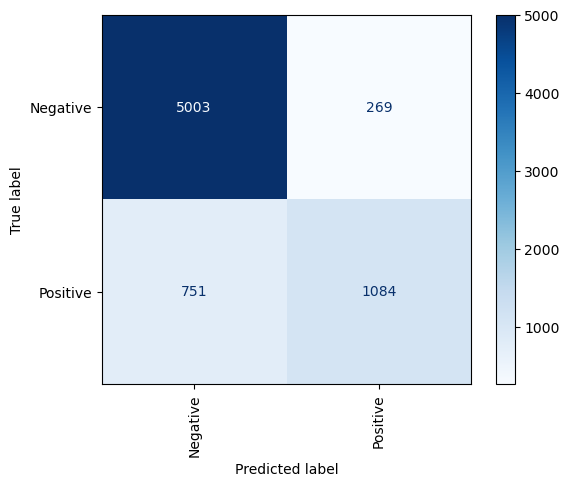

In [13]:
# CODE PROVIDED
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay

sns.reset_orig()
y_predicted = model.predict(x_test) > 0.5

accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

labels = ['Negative', 'Positive']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

This confusion matrix makes it clear that we have more false negative diagnoses than false positive diagnoses. That's not what we want. Let's try take a closer look at our data.

### Dealing with Dataset Imbalance

Take a look at the `value_counts` for the `Corona` column in the original `covid` dataset.

In [14]:
covid = pd.read_csv("corona.csv", encoding='utf-8', low_memory=False)
print(covid['Corona'].value_counts())

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64


We can see there is an imbalance in our data. Let's retrain our neural network for binary classification, and this time use the `class_weights` paramater of the `.fit()` method to try and handle the imbalanced nature of our data. We will be using the following formula to compute the `class_weights`: `[n_samples / (n_classes * freq)]`

Compute the class weight for each of the classes and store them in a dictionary called `class_weights` where the key is the binary value representing the class and the value is that class' weight. Then, retrain the neural network with the `class_weight` parameter set to the `class_weights` dictionary. Plot the training and validation accuracy, along with the confusion matrix.

In [15]:
from collections import Counter

#class counts
class_counts = Counter(y_train)
total_samples = len(y_train)
num_classes = len(class_counts)

class_weights = {
    int(label): total_samples / (num_classes * count)
    for label, count in class_counts.items()
}
print(class_weights)

{0: 0.6740006638531936, 1: 1.9367761275378117}


In [16]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(6,))) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=100,
    validation_data=(x_test, y_test),
    class_weight=class_weights
)

Epoch 1/10
285/285 [==============================] - 2s 3ms/step - loss: 0.4425 - accuracy: 0.8558 - val_loss: 0.3900 - val_accuracy: 0.8655
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8688 - val_loss: 0.3560 - val_accuracy: 0.8649
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.8684 - val_loss: 0.3531 - val_accuracy: 0.8649
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8682 - val_loss: 0.3643 - val_accuracy: 0.8637
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3684 - accuracy: 0.8682 - val_loss: 0.3768 - val_accuracy: 0.8637
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8682 - val_loss: 0.3648 - val_accuracy: 0.8637
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: 0.3680 - accuracy: 0.8682 - val_loss: 0.3765 - val_accuracy: 0.8637
Epoch 

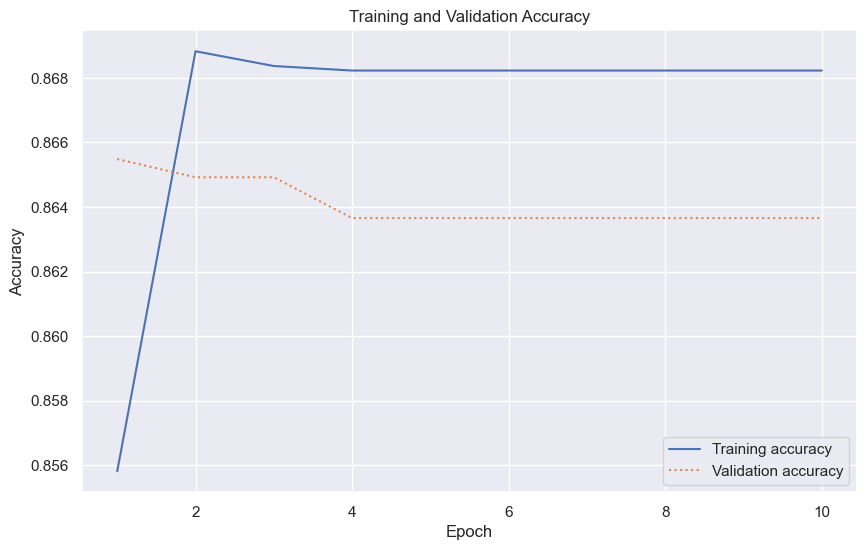

In [17]:
# CODE PROVIDED
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

223/223 [==============================] - 0s 2ms/step
Accuracy: 0.8637
Recall: 0.8518
F1 Score: 0.7634
Precision: 0.6916


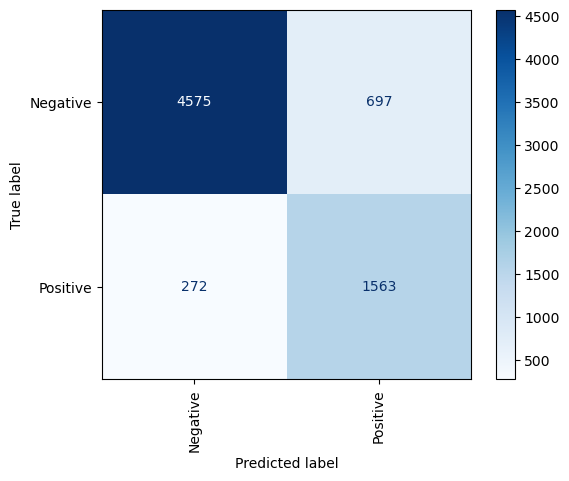

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

sns.reset_orig()

y_predicted = (model.predict(x_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

labels = ['Negative', 'Positive']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

Our retrained model should perform much better: the number false negatives should be less than the number of false positives.

### Export datasets for codegrade evaluation
Using the "pickle" library:

Export the symptoms and diagnosis datasets

In [19]:
# CODE PROVIDED
import pickle

#Save dataset to file
with open('symptoms.pkl', 'wb') as file:
    pickle.dump(symptoms , file)   ## --> MAKE SURE TO EXPORT THE RIGHT DATASET

with open('diagnosis.pkl', 'wb') as file:
    pickle.dump(diagnosis , file)   ## --> MAKE SURE TO EXPORT THE RIGHT DATASET



### Export Models for codegrade evaluation
Using the "dill" library:

Export the trained model

In [20]:
# CODE PROVIDED
model.save('NN_BinayClass.h5')